<a href="https://colab.research.google.com/github/MinCiencia/Datos-COVID19/blob/master/DataObservatory_ex1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="Data Observatory logo" height="150px" src="http://dataobservatory.io/wp-content/themes/data-observatory-01/img/do-logo-web-01.png"  align="left" hspace="10px" vspace="0px"></p>

<h1 align="center">Bienvenido al jupyter notebook: ejemplos para ayudar a usar los datos publicados</h1>
<h4 align="center">Una contribución del Data Observatory</h4>




## **Para empezar**

Este documento te permite interactuar con los datos que se encuentran en el [repositorio](https://github.com/MinCiencia/Datos-COVID19) del [Ministerio de Ciencia, Tecnología, Conocimiento e Innovación](http://www.minciencia.gob.cl/COVID19). Estos datos son recopilados de las cifras oficiales publicadas por el [Ministerio de Salud](https://www.gob.cl/coronavirus/cifrasoficiales/#informes) sobre la pandemia del COVID-19 en Chile.

Este notebook es un ejemplo y puedes usarlo como base para generar tus propios gráficos y/o productos. Los datos publicados están en https://colab.research.google.com/github/MinCiencia/output/blob/master


# <h2>Para trabajar con los productos</h2>

Este notebook está escrito utilizando el lenguaje de programación [Python](https://www.python.org/about/) versión [3.x](https://www.python.org/download/releases/3.0/), cuya lectura se facilita a programadores no expertos. Cada bloque de ejecución está separado en distintas celdas, es necesario "ejecutar" cada una en secuencia haciendo click en botón "play" que aparece al posicionar el mouse sobre el recuadro [ ] al inicio de cada celda. Una vez que la celda se ejecuta, aparece un número que indica el órden en que se ha ejecutado.




Una manera comun de manipular los datos, es usando [pandas](https://pandas.pydata.org/). Para cargar uno de los archivos en un dataframe. También es necesario utilizar [numpy](https://numpy.org/) para los distintos cálculos

In [0]:
import numpy as np
import pandas as pd

Los datos están almacenados como tablas en formato csv. Algunas tablas están almacenadas por día. Es importante mantener el formato 'año-mes-día' (las comillas simples o dobles indican que es texto y no se ejecutará como una operación matemática)


In [0]:
# el símbolo # al inicio de la línea nos indica que esto es un comentario, no se ejecuta con el código
# date indica la fecha de los datos que queremos utilizar

date = '2020-05-05'

Para leer la tabla correspondiente al día escogido y se le asigna el nombre dataTotalRegion:

In [0]:
dataTotalRegion = pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto4/"+date+"-CasosConfirmados-totalRegional.csv", index_col='Region')

Utilizamos read_csv de pandas con el parámetro

```
# index_col = 'Region'
```

para indicar que el índice de la tabla son los nombres de las regiones. Los nombres de las columnas se listan a continuación

In [0]:
columnas = list(dataTotalRegion.columns.values)
columnas

['Casos  totales  acumulados',
 'Casos  nuevos  totales',
 'Casos  nuevos  con  sintomas',
 'Casos  nuevos  sin  sintomas*',
 'Fallecidos',
 '%  Total']

Podemos ver los valores de las columnas ejecutando en una celda

```
# dataTotalRegion
```

En algunos casos la tabla puede ser muy extensa y eso puede resultar poco práctico. Para limitar ese despliegue se pueden escoger algunas columnas, como por ejemplo

In [0]:
dataTotalRegion[columnas[0:2]].head(5)

,Casos totales acumulados,Casos nuevos totales
Region,,
Arica y Parinacota,315,7
Tarapaca,322,27
Antofagasta,811,51
Atacama,78,8
Coquimbo,97,6


entre los [ ] se indican las columnas deseadas, de la primera a la tercera en el ejemplo (**ojo, Python considera que el primer índice es el 0**). Además, se agrega el atributo 

```
# .head(5)
```
para listar las 5 primeras filas de la tabla. También podemos utilizar el atributo 

```
# .tail(4)
```

para listar las últimas 4 filas.


In [0]:
dataTotalRegion[columnas[0:2]].tail(4)

,Casos totales acumulados,Casos nuevos totales
Region,,
Los Lagos,525,1
Aysen,7,0
Magallanes,809,14
Total,22016,1317


o .iloc[ ] para filas intermedias


In [0]:
dataTotalRegion[columnas[0:2]].iloc[3:8]

,Casos totales acumulados,Casos nuevos totales
Region,,
Atacama,78,8
Coquimbo,97,6
Valparaiso,687,31
Metropolitana,14707,1179
O'Higgins,136,5


Para fines prácticos, separaremos los dataFrames en 'nuevosConfirmados' para los datos al día, 'totalConfirmados' para los datos acumulados y 'Fallecidos' para los decesos acumulados.

In [0]:
data = pd.DataFrame()

In [0]:
data['nuevosConfirmados'] = dataTotalRegion[columnas[0]]
data['totalConfirmados'] = dataTotalRegion[columnas[1]]
data['Fallecidos'] = dataTotalRegion[columnas[2]]

Para hacer gráficos utilizamos [matplotlib](https://matplotlib.org/), con el estilo (opcional) 'fivethirtyeight'

In [0]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

En ax se "dibujan" los datos, es importante notar que el dataFrame a graficar data['nuevosConfirmados'] se utiliza .iloc[:-1] para evitar que se utilice la última fila de datos que corresponde al **Total** que no es una Region.

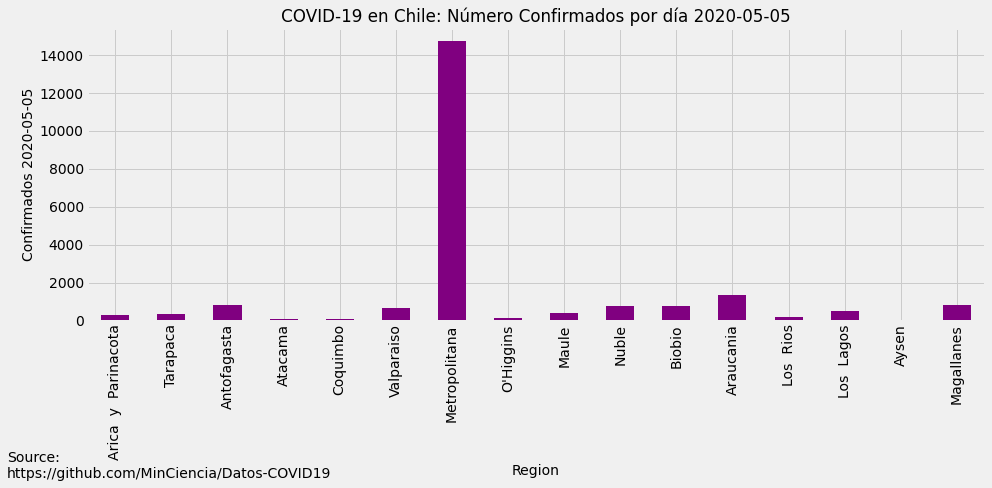

In [0]:
# Figura en la que definimos un tamaño con el parámetro figzise
# utilizamos una escala linear con la instrucción scale = 'linear'

fig, ax = plt.subplots(tight_layout=True,figsize=(14,7))

scale = 'linear'

data['nuevosConfirmados'].iloc[:-1].plot(ax=ax, kind="bar", color='purple')

ax.set_yscale(scale)

ax.set_title(f'COVID-19 en Chile: Número Confirmados por día '+date, fontsize='large')
ax.set_xlabel(f'Region', fontsize='medium')
ax.set_ylabel(f'Confirmados '+date, fontsize='medium')

plt.annotate('Source:\nhttps://github.com/MinCiencia/Datos-COVID19', (0,0), (-80,-130), fontsize='medium', xycoords='axes fraction', textcoords='offset points', va='top')
plt.savefig(date+'-COVID-19-Chile-Confirmados-Region.png', bbox_inches='tight', format='png', dvi=700)

Si queremos agregar información a la visualización de los datos, añadimos etiquetas a los gráficos utilizando una función (la definimos una vez y se "llamará" cuando se necesite). La utilizaremos en la figura siguiente como ejemplo

In [0]:
#  Función que define etiquetas en los gráficos. Aquí **no es necesario modificarla**
#
#  qué significan los parámetros:
#  data: el dataFrame a utilizar e.g. data['nuevosConfirmados'].iloc[:-1]
#  scale: la que se defina en el entorno de la figura
#  fontsize: tamaño de la fuente de la etiqueta
#  ypos: posición de la etiqueta con respecto al valor graficado
#  color: el color de la etiqueta (estamos utilizando transparencia con alpha=0.5)

def my_tags(data,scale,fontsize,ypos,color):
  for i, val in enumerate(data):
    if val > 0:
      if scale == 'log': y_position = val*ypos 
      elif scale == 'linear': y_position = val + ypos
      ax.text(i-len(str(i))*0.1, y_position, str(int(val)), fontsize=fontsize,
            bbox=dict(boxstyle="square",
                    alpha=0.5,
                    fc=color,))

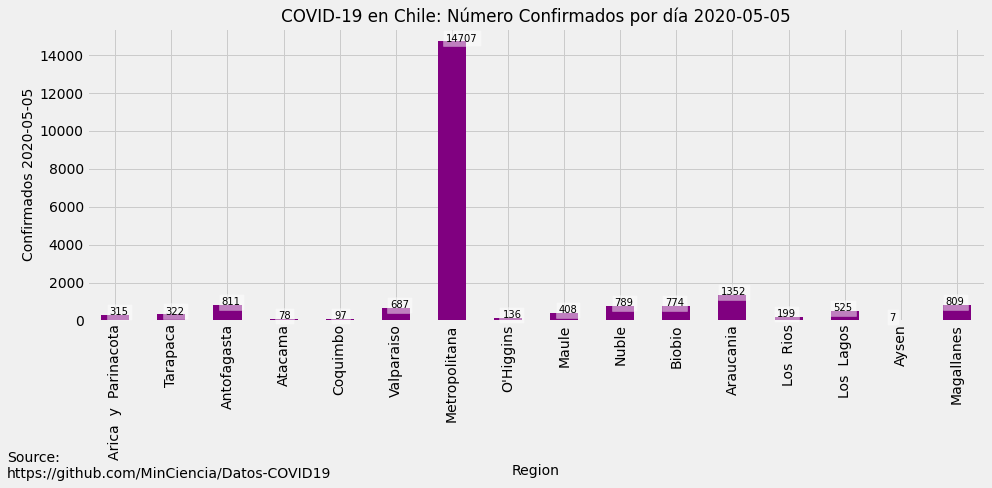

In [0]:
fig, ax = plt.subplots(tight_layout=True,figsize=(14,7))

scale = 'linear'

data['nuevosConfirmados'].iloc[:-1].plot(ax=ax, kind="bar", color='purple')

# llamamos a la función my_tags, con fontsize = 10, 
# ypos = 1.1 (esta posición es relativa al valor de cada dato. ypos = 1 coloca la etiqueta sobre el valor del dato)
# escogimos el color blanco 'white'

fontsize = 10
ypos = 1.1
my_tags(data['nuevosConfirmados'].iloc[:-1],scale,fontsize,ypos,'white')

ax.set_yscale(scale)

ax.set_title(f'COVID-19 en Chile: Número Confirmados por día '+date, fontsize='large')
ax.set_xlabel(f'Region', fontsize='medium')
ax.set_ylabel(f'Confirmados '+date, fontsize='medium')

#  el gráfico se almacena en formato .png 

plt.annotate('Source:\nhttps://github.com/MinCiencia/Datos-COVID19', (0,0), (-80,-130), fontsize='medium', xycoords='axes fraction', textcoords='offset points', va='top')

# definimos un nombre de archivo considerando la fecha utilizada 'date' (que es texto)

filename = date+'-COVID-19-Chile-Confirmados-Region.png'
plt.savefig(filename, bbox_inches='tight', format='png', dvi=700)

Importamos la biblioteca files de Google.colab para guardar el archivo correspondiente a la figura

In [0]:
from google.colab import files

files.download(filename)

Este gráfico se puede repetir para cada columna, es decir para data['totalConfirmados'] y data['Fallecidos'].

Estas son figuras básicas para trabajar con los productos del repositorio. La idea es que generes tus propios gráficos modificando las columnas, estilos, colores, etc. En los próximos notebooks encontrarás ejemplos para utilizar los datos que se encuentran disponibles en [https://github.com/MinCiencia/Datos-COVID19/tree/master/output](https://github.com/MinCiencia/Datos-COVID19/tree/master/output)

Este notebook está inspirado en el [trabajo](https://github.com/alonsosilvaallende/COVID-19/blob/master/COVID_19_Chile_Total_Fallecidos_por_Region.ipynb) publicado por Alonso Silva Allende.